In [1]:
# This notebook shows how to sample from a GP prior, which
# are the foundation of using GP for modelling.

In [2]:
import matplotlib.pylab as plt
import numpy as np

np.random.seed(42)


In [3]:
# Define kernel function as exponential:


def exponential_cov(x_1, x_2, thetas):
    """Calculates the similarity matrix for points x and y
    for the radial basis kernel:
    cov(x_1, x_2) = theta_0 * exp(-theta_1^-2 * (x_1-x_2)^2)

    Args:
        x (_type_): _description_
        y (_type_): _description_
        thetas = list of two elements containing:
            theta_0 (_type_): overall variance, scaling parameter
            theta_1 (_type_): lengsth scale: the larger value the less wiggly the priors and vice versa.

    Returns:
        _type_: _description_
    """
    return thetas[0] * np.exp(-(1 / 2) / thetas[1]**2 * np.subtract.outer(x_1, x_2) ** (2))


(-3.0, 3.0)

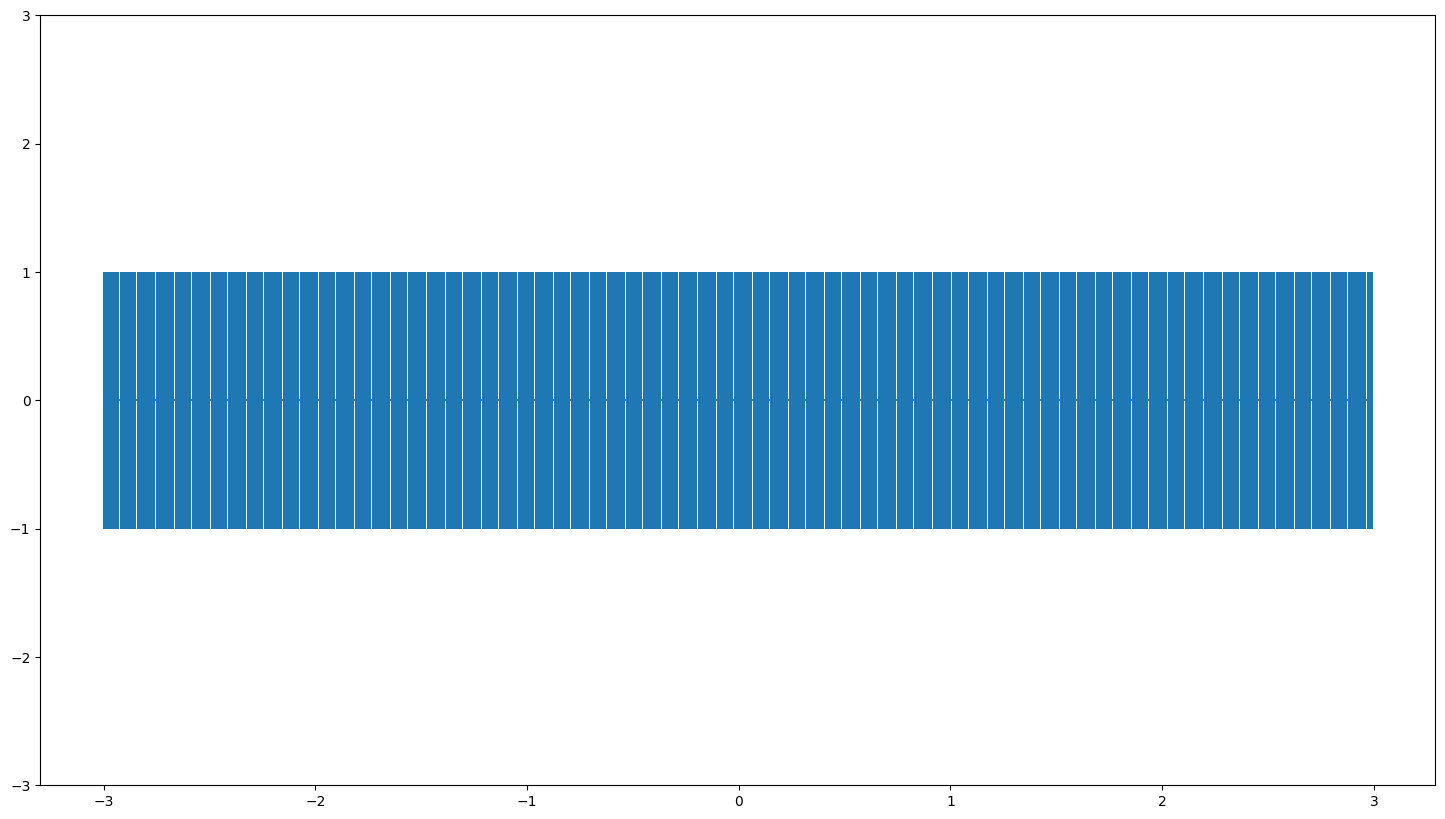

In [4]:
thetas = [1, 1/10]

sigma_0 = exponential_cov(0, 0, thetas)
x = np.arange(-3, 3, step=0.01)

plt.figure(figsize=(18,10))
plt.errorbar(x, np.zeros(len(x)), yerr=sigma_0)
plt.ylim(-3, 3)


In [5]:
# Function to calc p(x_new|x,y) using Gaussian properties.
# We assume mean = 0 in this example:

def conditional(x_new, x, y, thetas):
    """Calculates the conditional probability that p(x_new | x, y)
    with the RBF-kernel defined above.

    Args:
        x_new (_type_): _description_
        x (_type_): _description_
        y (_type_): _description_
        
    Returns:
        _type_: _description_
    """
    B = exponential_cov(x_new, x, thetas)
    C = exponential_cov(x, x, thetas)
    A = exponential_cov(x_new, x_new, thetas)
    
    # These are analytically found expressions for
    # the mean and variance
    mu = 0 + np.matmul(B, np.linalg.inv(C)).dot(y) # zero mean
    # mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    
    return (mu.squeeze(), sigma.squeeze())


In [6]:
sigma_0

1.0

In [7]:
# Let's take one point, x=1 and draw a random sample from
# a normal distribution (as we don't have any previous points
# to condition on):

x = [1.0]
y = [np.random.normal(scale=sigma_0)]
print(x, y)


[1.0] [0.4967141530112327]


In [8]:
# Run x-point through kernel function:

sigma_1 = exponential_cov(x, x, thetas)
print(sigma_1)


[[1.]]


In [9]:
def predict(x, data, kernel, thetas, Sigma_matrix, t):
    cov_mat = [kernel(x, y, thetas) for y in data]
    
    Sigma_inv = np.linalg.inv(Sigma_matrix)
    y_pred = np.dot(cov_mat, Sigma_inv).dot(t)
    Sigma_new = kernel(x, x, thetas) - np.dot(cov_mat, Sigma_inv).dot(np.transpose(cov_mat))
    
    return y_pred, Sigma_new


In [10]:
x_pred = np.linspace(-3, 3, 600)

predictions = [predict(i, x, exponential_cov, thetas, sigma_1, y) for i in x_pred]


(-3.0, 3.0)

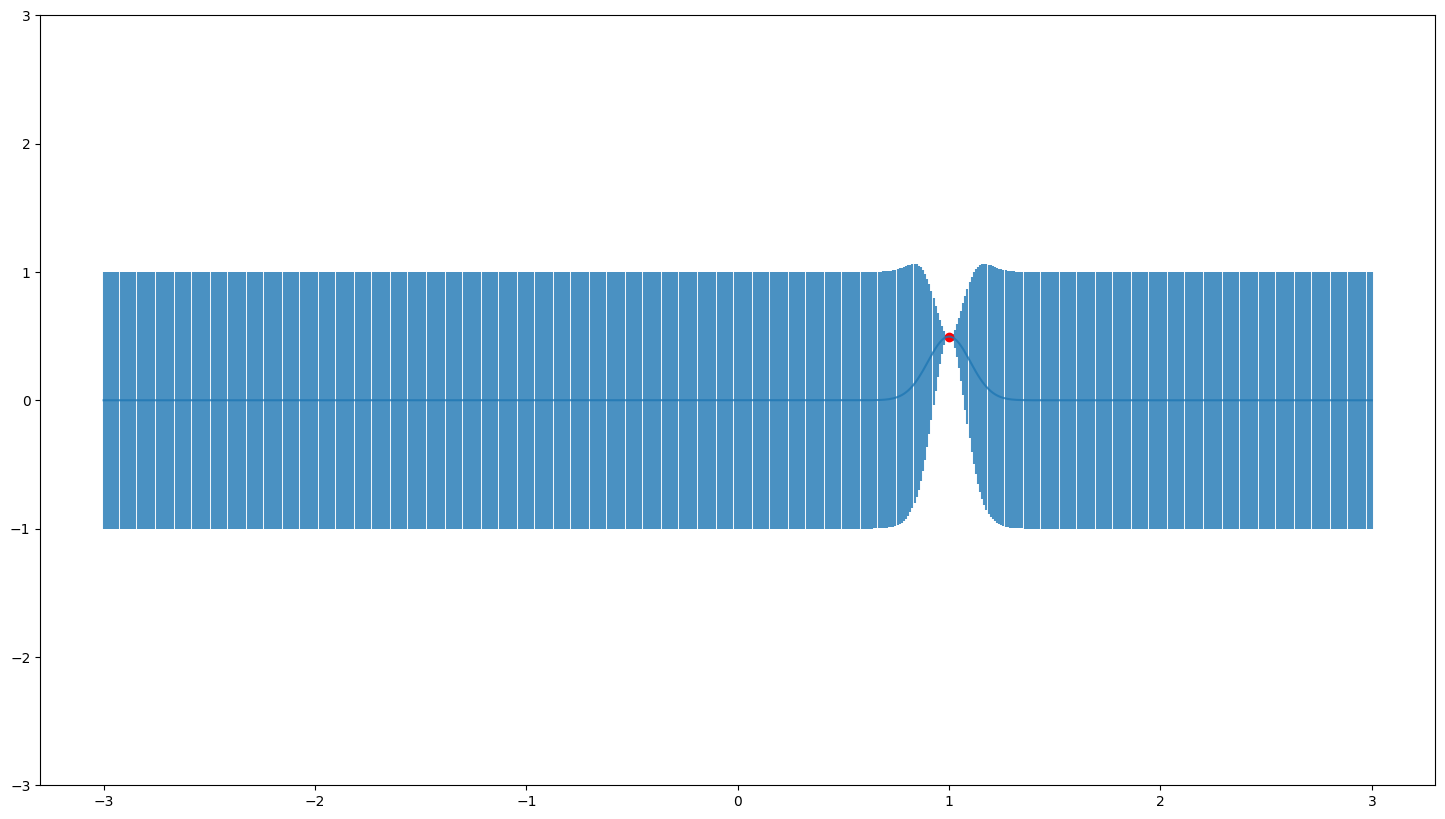

In [11]:
y_pred, sigmas = np.transpose(predictions)

plt.figure(figsize=(18,10))
plt.errorbar(x_pred, y_pred, yerr=sigmas, alpha=0.8)
plt.plot(x, y, "ro")
plt.ylim(-3, 3)


In [12]:
# Let's grab another sample from the x-axis!

m, s = conditional(-0.7, x, y, thetas)

# print(m, s)


y2 = np.random.normal(m, s)
# print(y2)


In [13]:
x.append(-0.7)
y.append(y2)
sigma_2 = exponential_cov(x, x, thetas)

[predict(i, x, exponential_cov, thetas, sigma_2, y) for i in x_pred]


[(-1.8613138096570873e-116, 1.0),
 (-1.8543245747791688e-115, 1.0),
 (-1.8289189118587886e-114, 1.0),
 (-1.785852927257032e-113, 1.0),
 (-1.726392225852883e-112, 1.0),
 (-1.6522501340056748e-111, 1.0),
 (-1.5655057327083822e-110, 1.0),
 (-1.468507169789847e-109, 1.0),
 (-1.3637665142558284e-108, 1.0),
 (-1.2538526912112877e-107, 1.0),
 (-1.141288792954088e-106, 1.0),
 (-1.0284593512122465e-105, 1.0),
 (-9.175320690913225e-105, 1.0),
 (-8.103971703414976e-104, 1.0),
 (-7.086260636408856e-103, 1.0),
 (-6.134495754531192e-102, 1.0),
 (-5.2575469668987773e-101, 1.0),
 (-4.460977104222097e-100, 1.0),
 (-3.7473078244580565e-99, 1.0),
 (-3.116386310726624e-98, 1.0),
 (-2.565817414788269e-97, 1.0),
 (-2.091427197422475e-96, 1.0),
 (-1.68772738284777e-95, 1.0),
 (-1.3483554178050103e-94, 1.0),
 (-1.0664709123924509e-93, 1.0),
 (-8.350955844211723e-93, 1.0),
 (-6.47389874309396e-92, 1.0),
 (-4.968647191282317e-91, 1.0),
 (-3.7753129676463097e-90, 1.0),
 (-2.839947437861471e-89, 1.0),
 (-2.114999

(-3.0, 3.0)

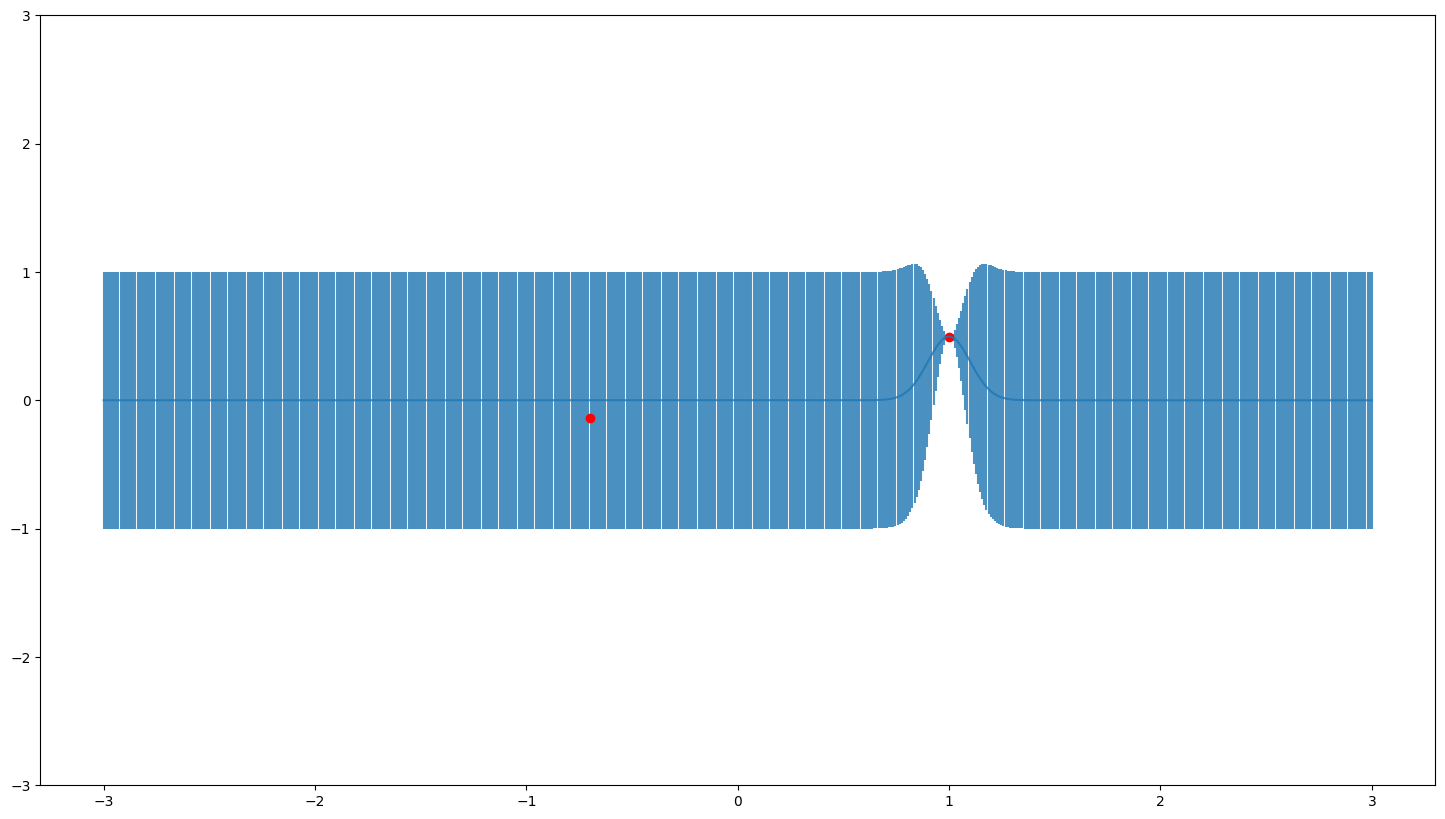

In [14]:
y_pred, sigmas= np.transpose(predictions)

plt.figure(figsize=(18,10))
plt.errorbar(x_pred, y_pred, yerr=sigmas, alpha=0.8)
plt.plot(x, y, "ro")
plt.ylim(-3, 3)


In [15]:
x_more = [-2.6, -1.4, 0.4, 1.8, 2.5]
mu, s = conditional(x_more, x, y, thetas)
y_more = np.random.multivariate_normal(mu, s)
print(y_more)


[ 0.23415337 -1.52302986  0.23413696 -1.57465705  0.65868713]


(-3.0, 3.0)

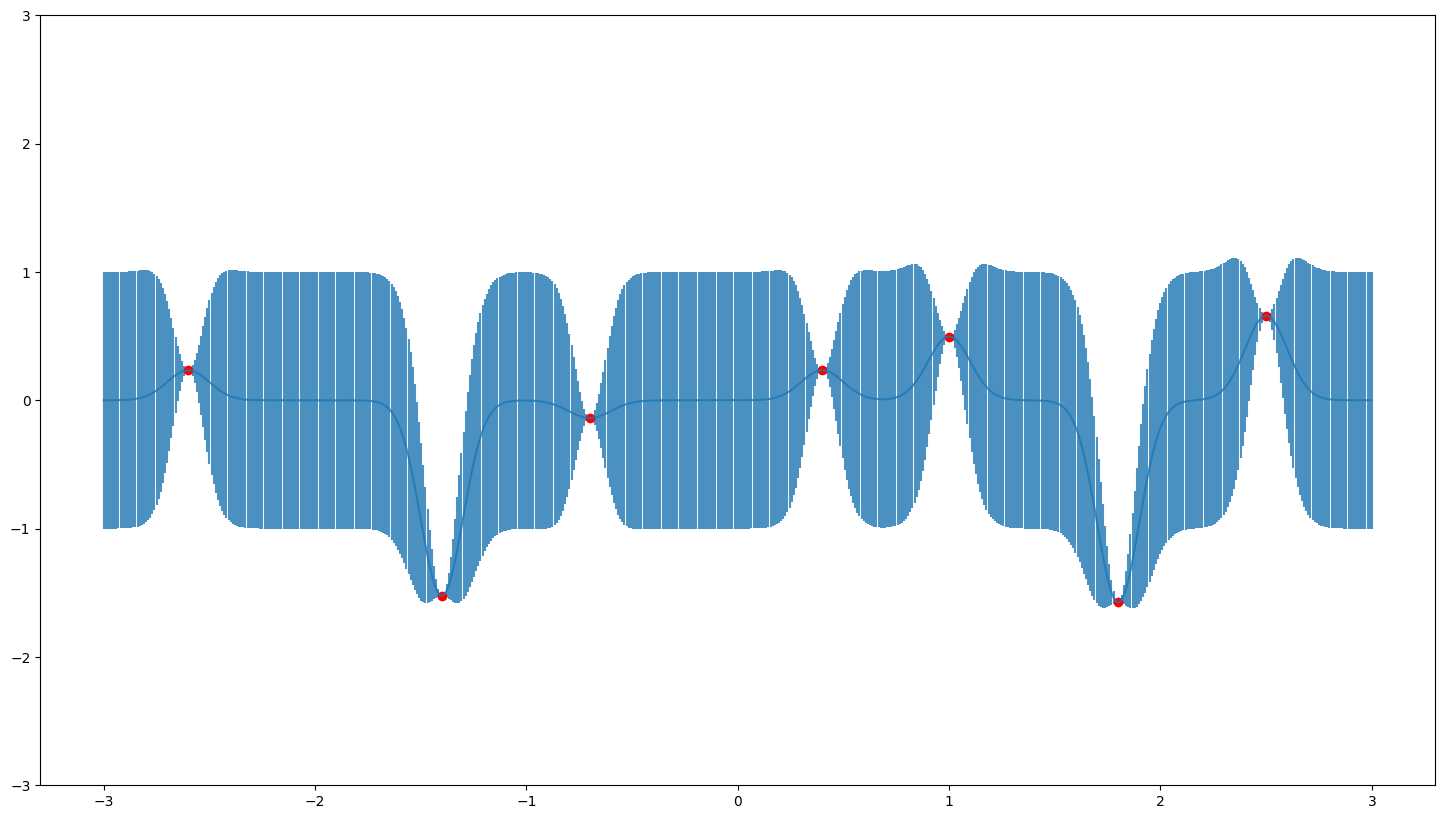

In [16]:
x += x_more
y += y_more.tolist()
sigma_new = exponential_cov(x, x, thetas)
predictions = [predict(i, x, exponential_cov, thetas, sigma_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)

plt.figure(figsize=(18, 10))
plt.errorbar(x_pred, y_pred, yerr=sigmas, alpha=0.8)
plt.plot(x, y, "ro")
plt.ylim(-3, 3)
